# НИРС по дисциплине «Технологии машинного обучения»
# Пермяков Дмитрий ИУ5-63Б

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Поиск и выбор набора данных для построения моделей машинного обучения.

Для проведения анализа я выбрал датасет о сердечных заболеваниях: https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset


О датасете:
*   age: Возраст пациента
*   sex: Пол пациента
*   cp: Тип боли в груди, 0 = типичная стенокардия, 1 = атипичная стенокардия, 2 = неангинальная боль, 3 = бессимптомная
*   trtbps: Артериальное давление в состоянии покоя (в мм рт. ст.)
*   chol: Холесторал в мг/дл, полученный с помощью датчика BMI
*   fbs: (уровень сахара в крови натощак > 120 мг/дл), 1 = верно, 0 = неверно
*   restecg: Результаты электрокардиографии в покое, 0 = норма, 1 = нормальный зубец ST-T, 2 = гипертрофия левого желудочка.
*   thalachh: Максимально достигнутая частота сердечных сокращенийчастота сердечных сокращений
*   oldpeak: Предыдущий пик
*   slp: Склон
*   caa: Количество крупных сосудов (0-3)
*   thall: Результат стресс-теста с талием ~ (0,3)
*   exng: Стенокардия, вызванная физической нагрузкой ~ 1 = Да, 0 = Нет
*   output: Целевая переменная, 0 = меньше шансов на сердечный приступ, 1= больше шансов на сердечный приступ
























In [ ]:
data = pd.read_csv('data/heart.csv')

# Проведение разведочного анализа данных. Построение графиков, необходимых для понимания структуры данных. Анализ и заполнение пропусков в данных.

In [ ]:
print(data.head())

   age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1  


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


In [ ]:
print(data.describe())

              age         sex          cp      trtbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg    thalachh        exng     oldpeak         slp         caa  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.9051

In [ ]:
data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

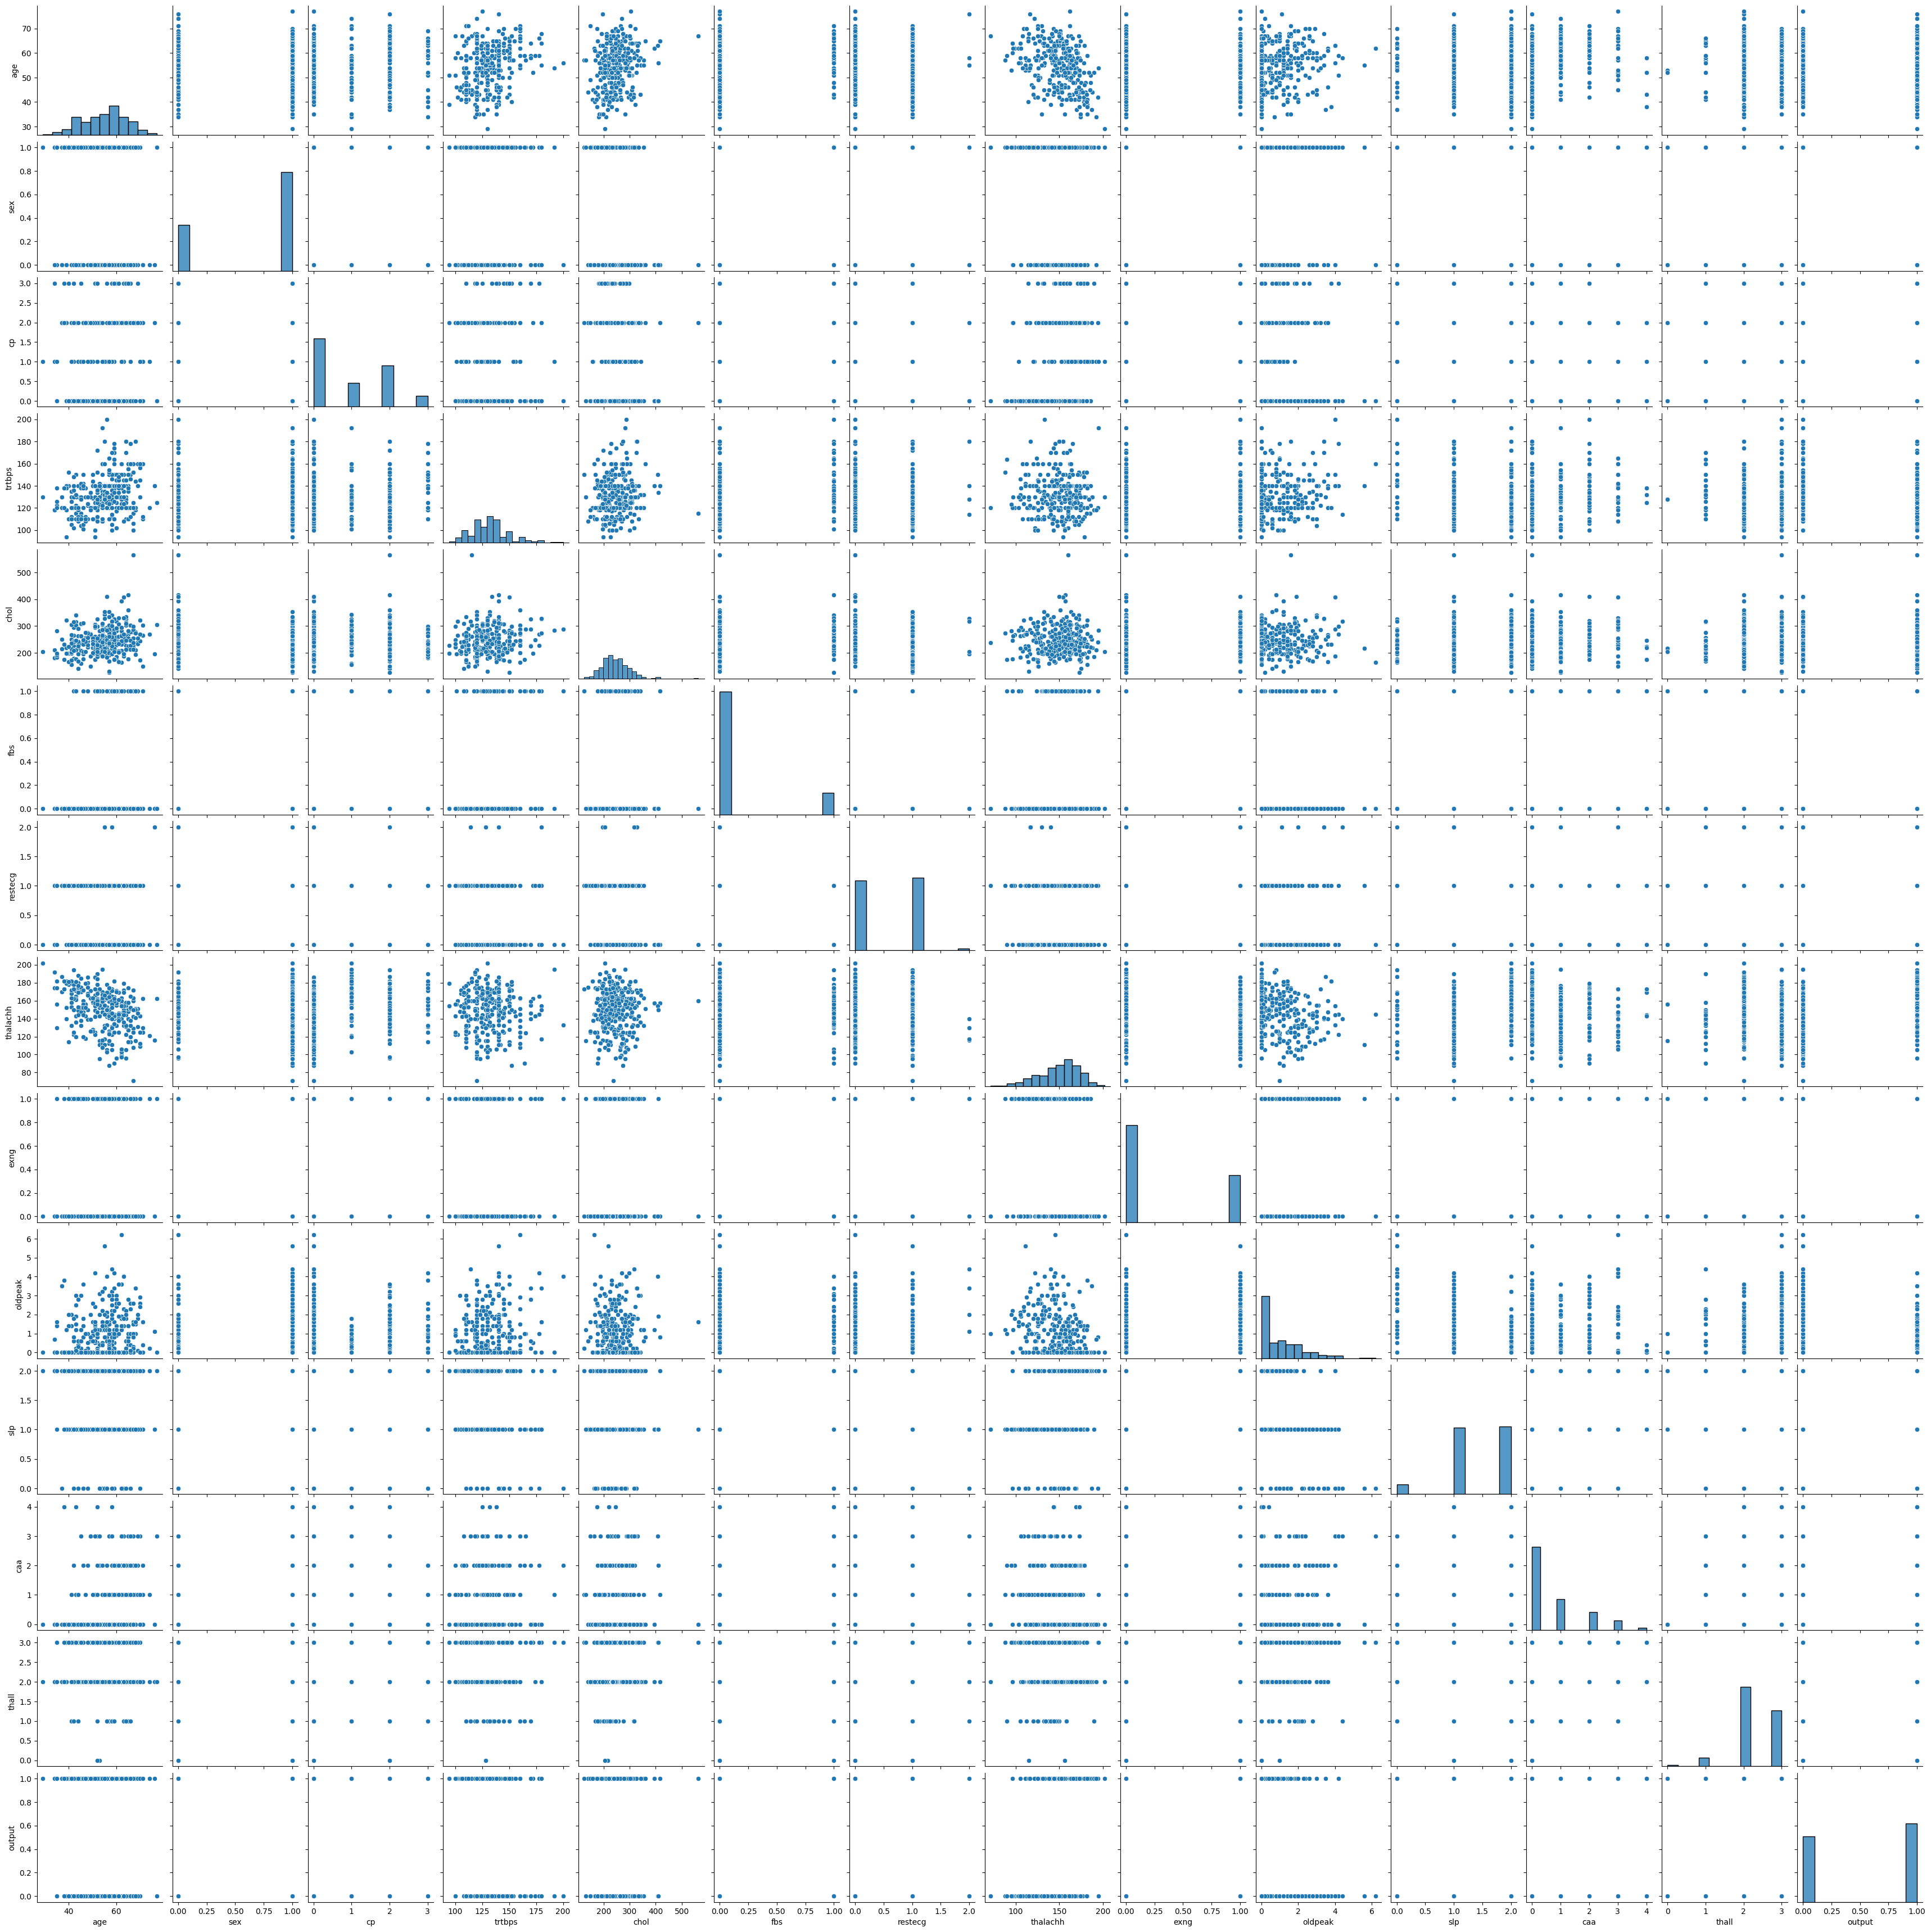

In [ ]:
# Парные диаграммы
sns.pairplot(data)

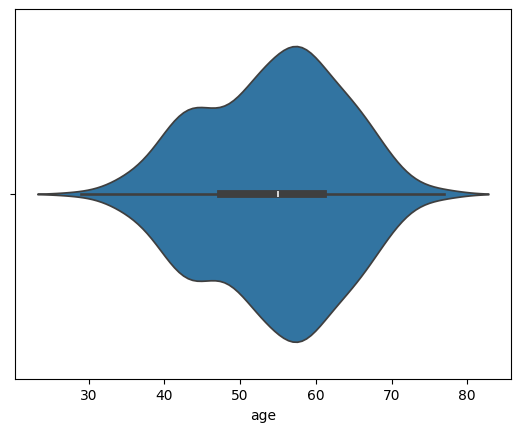

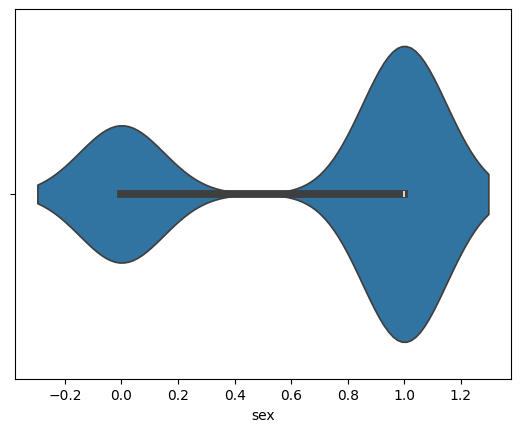

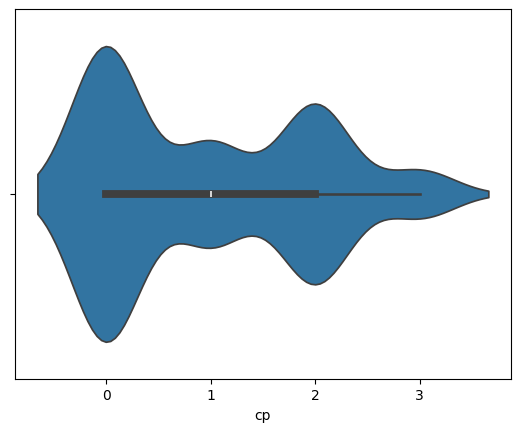

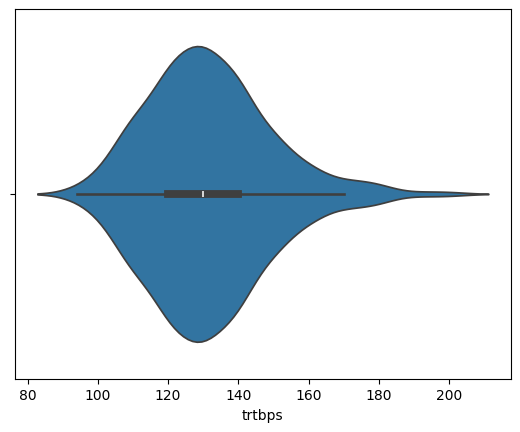

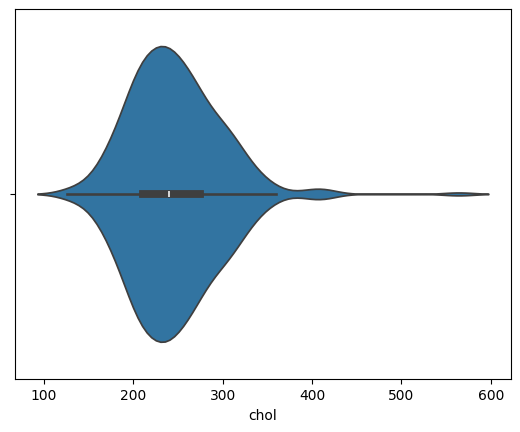

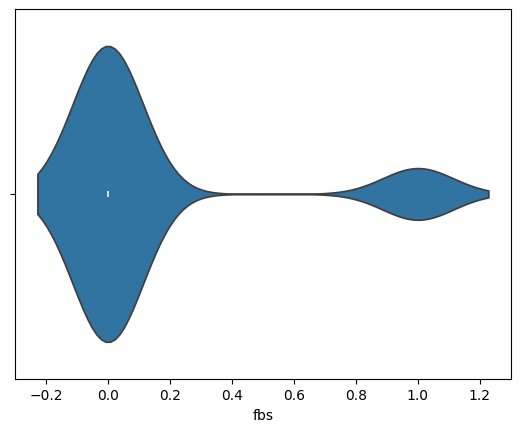

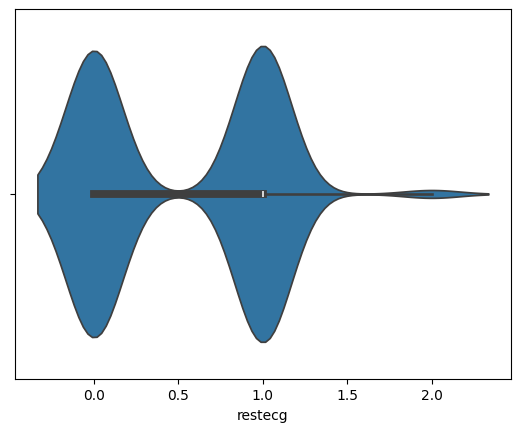

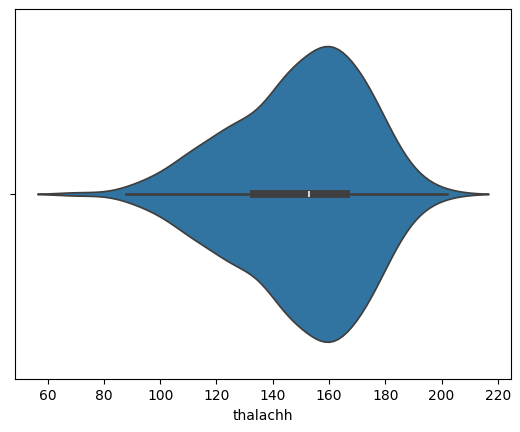

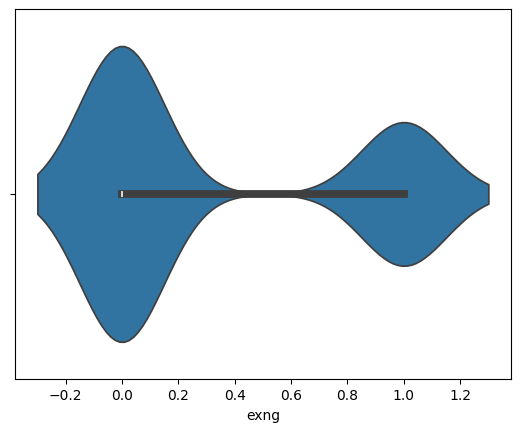

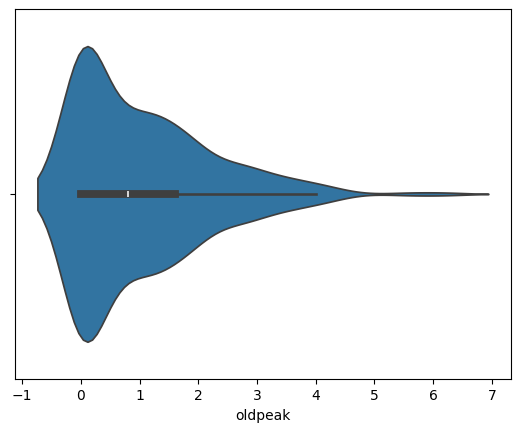

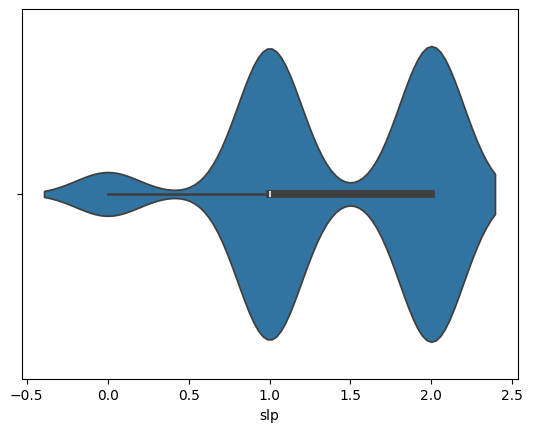

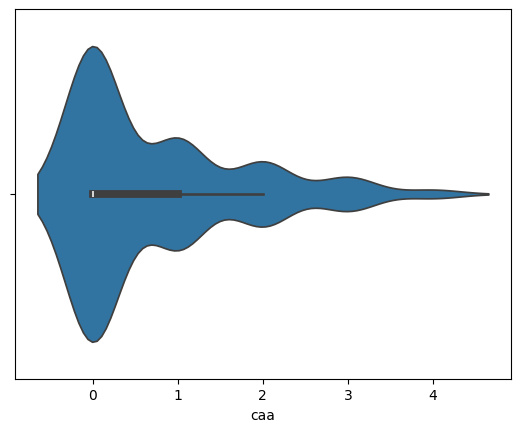

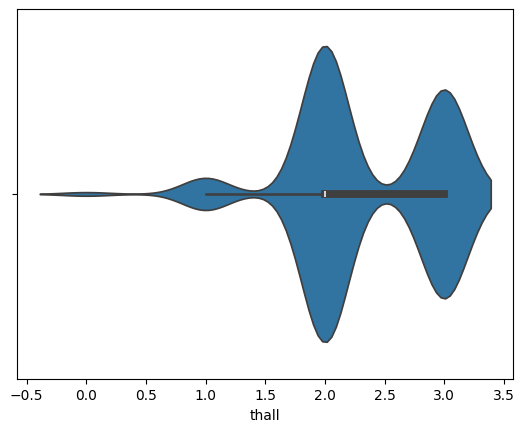

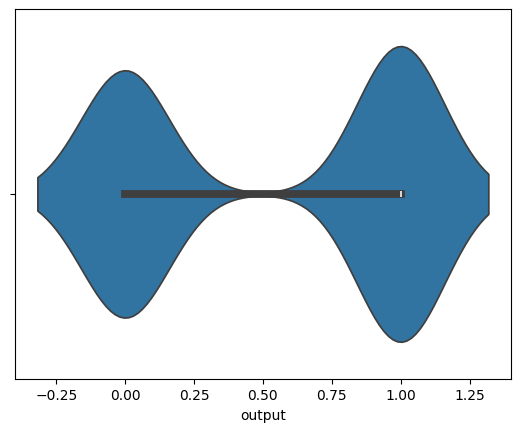

In [ ]:
# Скрипичные диаграммы для числовых колонок
for col in ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output']:
    sns.violinplot(x=data[col])
    plt.show()

# Выбор признаков, подходящих для построения моделей. Кодирование категориальных признаков. Масштабирование данных. Формирование вспомогательных признаков, улучшающих качество моделей.



In [ ]:
scale_cols = ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output']

In [ ]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[scale_cols])

In [ ]:
# Добавим масштабированные данные в набор данных
for i in range(len(scale_cols)):
    col = scale_cols[i]
    new_col_name = col + '_scaled'
    data[new_col_name] = sc1_data[:,i]

In [ ]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,...,chol_scaled,fbs_scaled,restecg_scaled,thalachh_scaled,exng_scaled,oldpeak_scaled,slp_scaled,caa_scaled,thall_scaled,output_scaled
0,63,1,3,145,233,1,0,150,0,2.3,...,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333,1.0
1,37,1,2,130,250,0,1,187,0,3.5,...,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667,1.0
2,41,0,1,130,204,0,0,172,0,1.4,...,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667,1.0
3,56,1,1,120,236,0,1,178,0,0.8,...,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667,1.0
4,57,0,0,120,354,0,1,163,1,0.6,...,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667,1.0


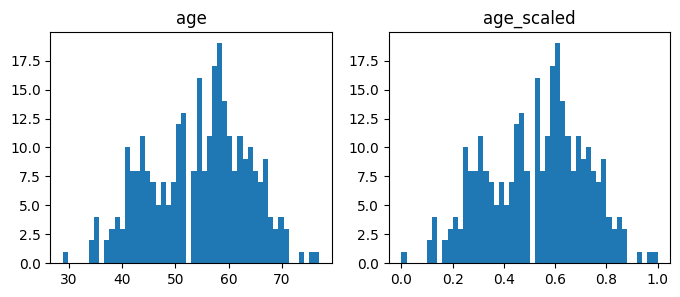

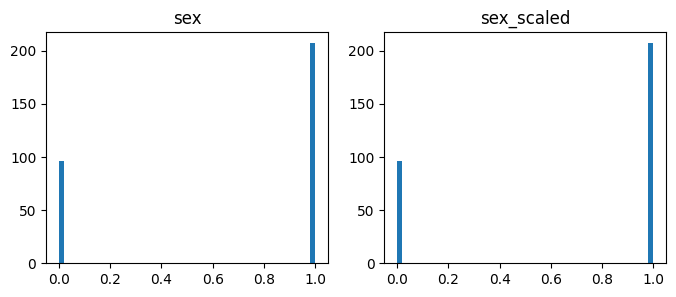

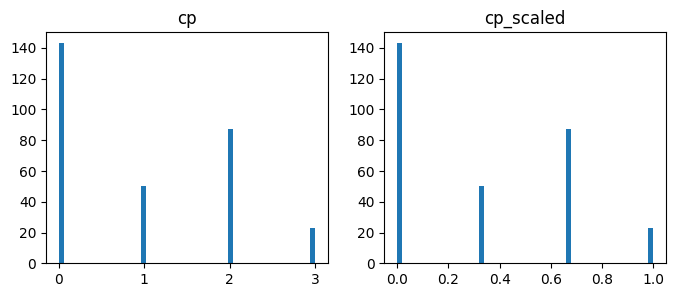

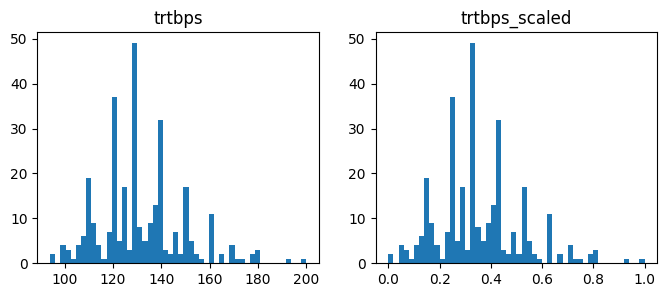

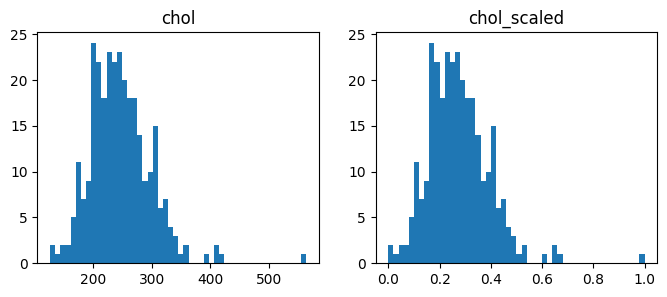

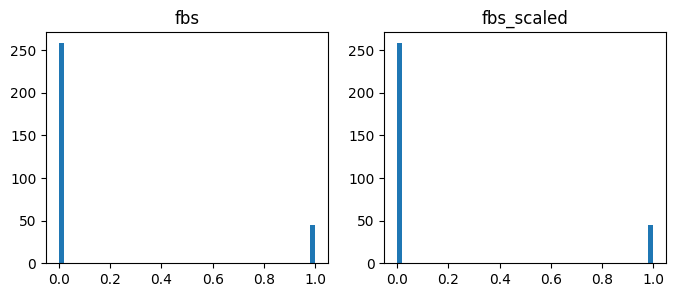

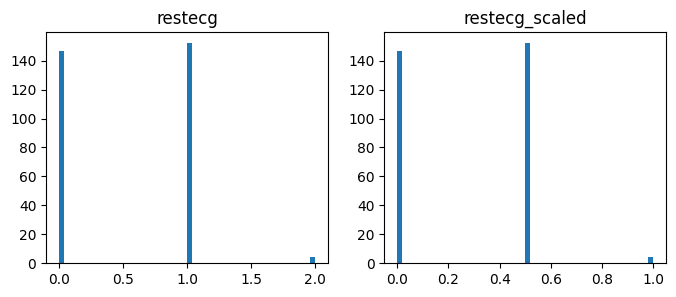

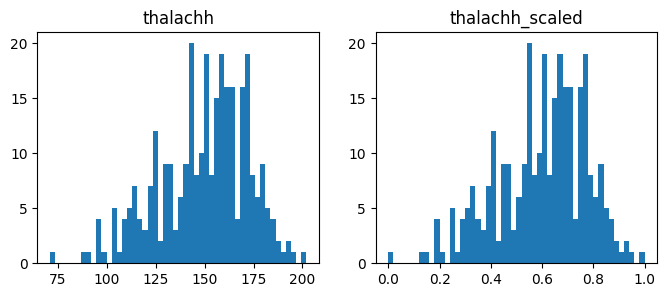

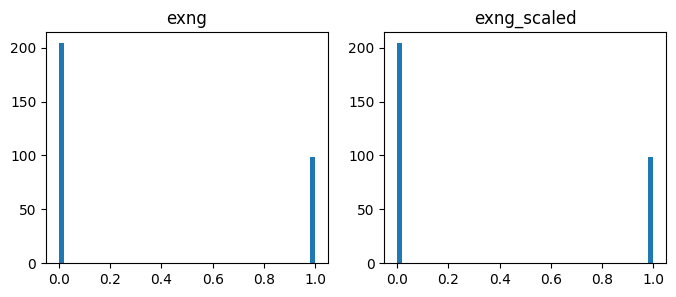

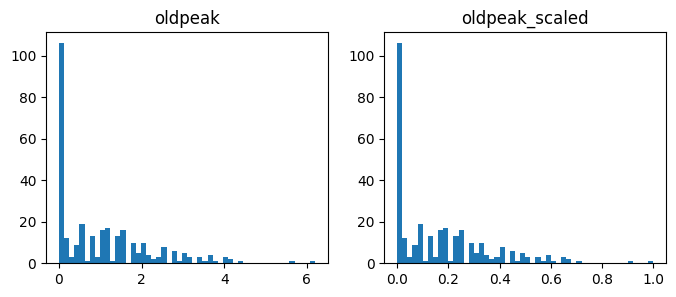

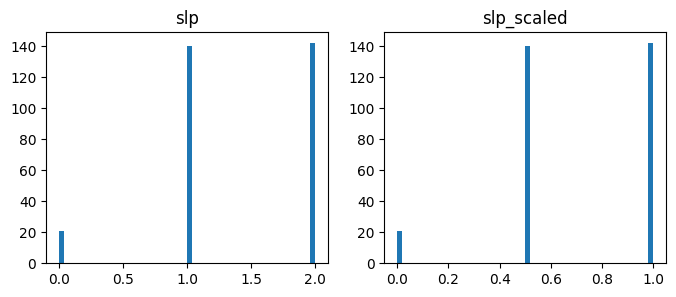

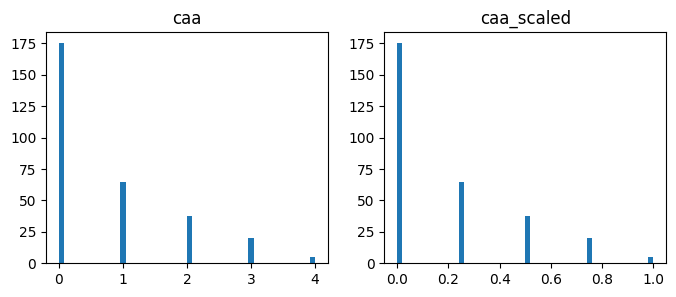

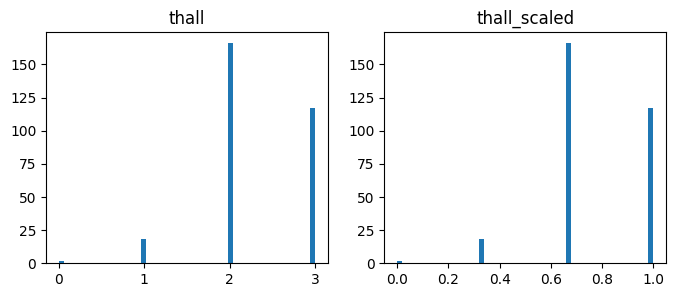

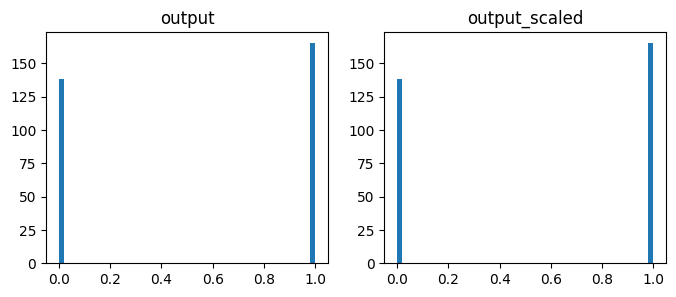

In [ ]:
# Проверим, что масштабирование не повлияло на распределение данных
for col in scale_cols:
    col_scaled = col + '_scaled'

    fig, ax = plt.subplots(1, 2, figsize=(8,3))
    ax[0].hist(data[col], 50)
    ax[1].hist(data[col_scaled], 50)
    ax[0].title.set_text(col)
    ax[1].title.set_text(col_scaled)
    plt.show()

In [ ]:
data['output'].unique()

array([1, 0])

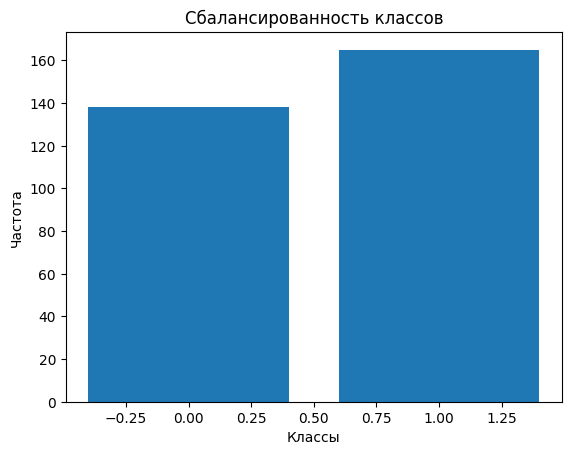

In [ ]:
# получаем частоту каждого класса
class_counts = data['output'].value_counts()

# строим столбчатую диаграмму
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Классы')
plt.ylabel('Частота')
plt.title('Сбалансированность классов')
plt.show()

# Проведение корреляционного анализа данных. Формирование промежуточных выводов о возможности построения моделей машинного обучения.

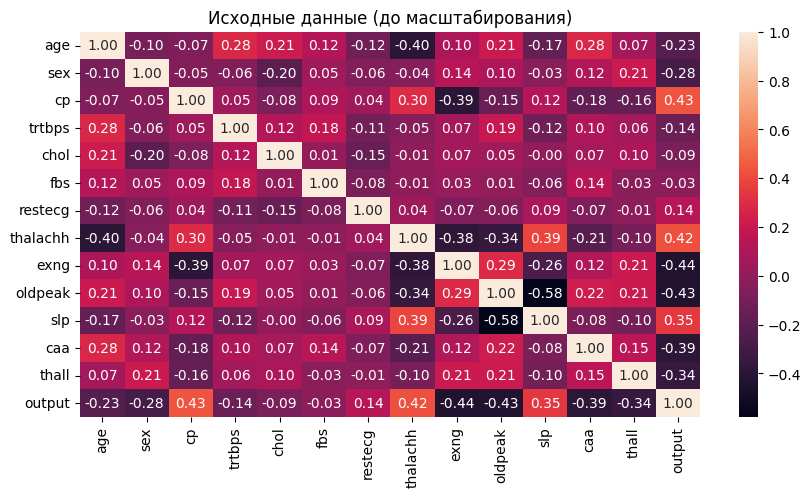

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(data[scale_cols].corr(), annot=True, fmt='.2f')
ax.set_title('Исходные данные (до масштабирования)')
plt.show()

In [ ]:
scale_cols_postfix = [x+'_scaled' for x in scale_cols]
corr_cols_2 = scale_cols_postfix
corr_cols_2

['age_scaled',
 'sex_scaled',
 'cp_scaled',
 'trtbps_scaled',
 'chol_scaled',
 'fbs_scaled',
 'restecg_scaled',
 'thalachh_scaled',
 'exng_scaled',
 'oldpeak_scaled',
 'slp_scaled',
 'caa_scaled',
 'thall_scaled',
 'output_scaled']

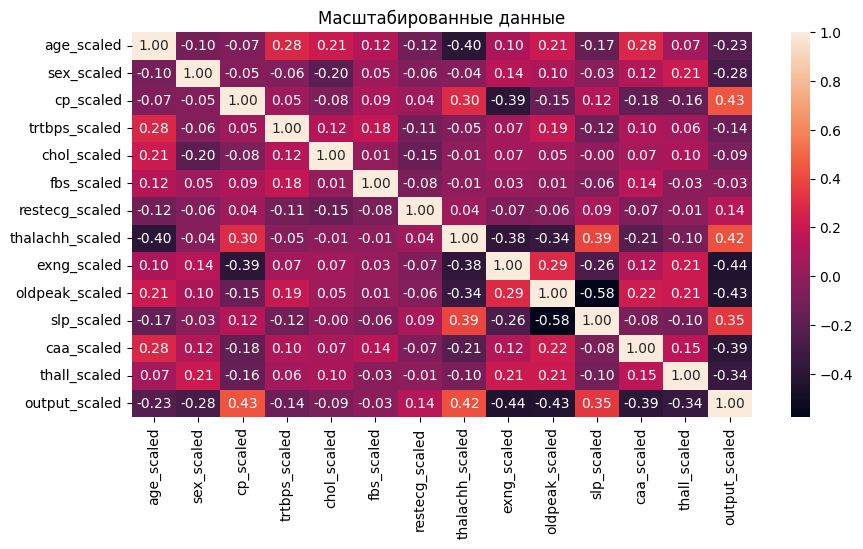

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(data[corr_cols_2].corr(), annot=True, fmt='.2f')
ax.set_title('Масштабированные данные')
plt.show()

Корреляционные матрицы для исходных и масштабированных данных совпадают.

Категориальные признаки отсутствуют, их кодирования не требуется.

Вспомогательные признаки для улучшения качества моделей в данном примере мы строить не будем.


# Выбор метрик для последующей оценки качества моделей

*   Accuracy - Общая точность модели, показывает долю правильных ответов.
*   Precision - Точность положительных прогнозов, хорошо подходит, когда важно минимизировать ложные тревоги.
*   Recall - Полнота положительных прогнозов, важно, когда критично не упустить положительные случаи.
*   F1-score - Гармоническое среднее precision и recall, баланс между ними.
*   ROC-AUC - Площадь под ROC-кривой для оценки качества бинарных моделей классификации.

In [ ]:
metrics = {
    'accuracy': accuracy_score,
    'precision': precision_score,
    'recall': recall_score,
    'f1': f1_score,
    'roc_auc': roc_auc_score
}

# Выбор наиболее подходящих моделей для решения задачи классификации.

*   Логистическая регрессия
*   Решающее дерево
*   Случайный лес
*   Градиентный бустинг
*   Адаптивный бустинг
*   Опорно-векторная машина

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'SVM': SVC(probability=True)
}

In [ ]:
data['output'].unique()

array([1, 0])

In [ ]:
X = data.drop(columns=['output', 'output_scaled'])
y = data['output']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Построение базового решения (baseline) для выбранных моделей без подбора гиперпараметров. Производится обучение моделей на основе обучающей выборки и оценка качества моделей на основе тестовой выборки.

In [ ]:
baseline_results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    baseline_results[name] = {metric_name: metric(y_test, y_pred) for metric_name, metric in metrics.items()}

# Выводим базовые результаты
print(pd.DataFrame(baseline_results))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


           Logistic Regression  Decision Tree  Random Forest  \
accuracy              0.852459       0.819672       0.819672   
precision             0.870968       0.862069       0.838710   
recall                0.843750       0.781250       0.812500   
f1                    0.857143       0.819672       0.825397   
roc_auc               0.852909       0.821659       0.820043   

           Gradient Boosting  AdaBoost       SVM  
accuracy            0.770492  0.803279  0.704918  
precision           0.800000  0.857143  0.666667  
recall              0.750000  0.750000  0.875000  
f1                  0.774194  0.800000  0.756757  
roc_auc             0.771552  0.806034  0.696121  


# Подбор гиперпараметров для выбранных моделей.

In [ ]:
param_grid = {
    'Random Forest': {'n_estimators': [100, 200], 'max_features': ['auto', 'sqrt']},
    'Gradient Boosting': {'n_estimators': [100, 200], 'learning_rate': [0.1, 0.01]},
    'AdaBoost': {'n_estimators': [50, 100], 'learning_rate': [1.0, 0.1]},
    'SVM': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
}

best_models = {}

for name in param_grid:
    print(f"Optimizing {name}")
    grid_search = GridSearchCV(estimator=models[name], param_grid=param_grid[name], cv=5, n_jobs=-1, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_models[name] = grid_search.best_estimator_

# Для логистической регрессии и дерева решений оставляем базовые модели
best_models['Logistic Regression'] = models['Logistic Regression']
best_models['Decision Tree'] = models['Decision Tree']

for name, model in best_models.items():
    print(f"Best parameters for {name}: {model.get_params()}")

Optimizing Random Forest
Optimizing Gradient Boosting
Optimizing AdaBoost
Optimizing SVM
Best parameters for Random Forest: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
Best parameters for Gradient Boosting: {'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'log_loss', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
Bes

# Повторение обучения на оптимальных значениях гиперпараметров

In [ ]:
tuned_results = {}

for name, model in best_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    tuned_results[name] = {metric_name: metric(y_test, y_pred) for metric_name, metric in metrics.items()}

# Вывод настроенных результатов
print(pd.DataFrame(tuned_results))

# Сравнение с базовыми результатами
baseline_df = pd.DataFrame(baseline_results)
tuned_df = pd.DataFrame(tuned_results)

print("Baseline results vs Tuned results:")
print(pd.concat([baseline_df, tuned_df], axis=1, keys=['Baseline', 'Tuned']))

           Random Forest  Gradient Boosting  AdaBoost       SVM  \
accuracy        0.852459           0.770492  0.852459  0.868852   
precision       0.848485           0.800000  0.870968  0.875000   
recall          0.875000           0.750000  0.843750  0.875000   
f1              0.861538           0.774194  0.857143  0.875000   
roc_auc         0.851293           0.771552  0.852909  0.868534   

           Logistic Regression  Decision Tree  
accuracy              0.852459       0.786885  
precision             0.870968       0.880000  
recall                0.843750       0.687500  
f1                    0.857143       0.771930  
roc_auc               0.852909       0.792026  
Baseline results vs Tuned results:
                     Baseline                                                \
          Logistic Regression Decision Tree Random Forest Gradient Boosting   
accuracy             0.852459      0.819672      0.819672          0.770492   
precision            0.870968      0.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Формирование выводов о качестве построенных моделей

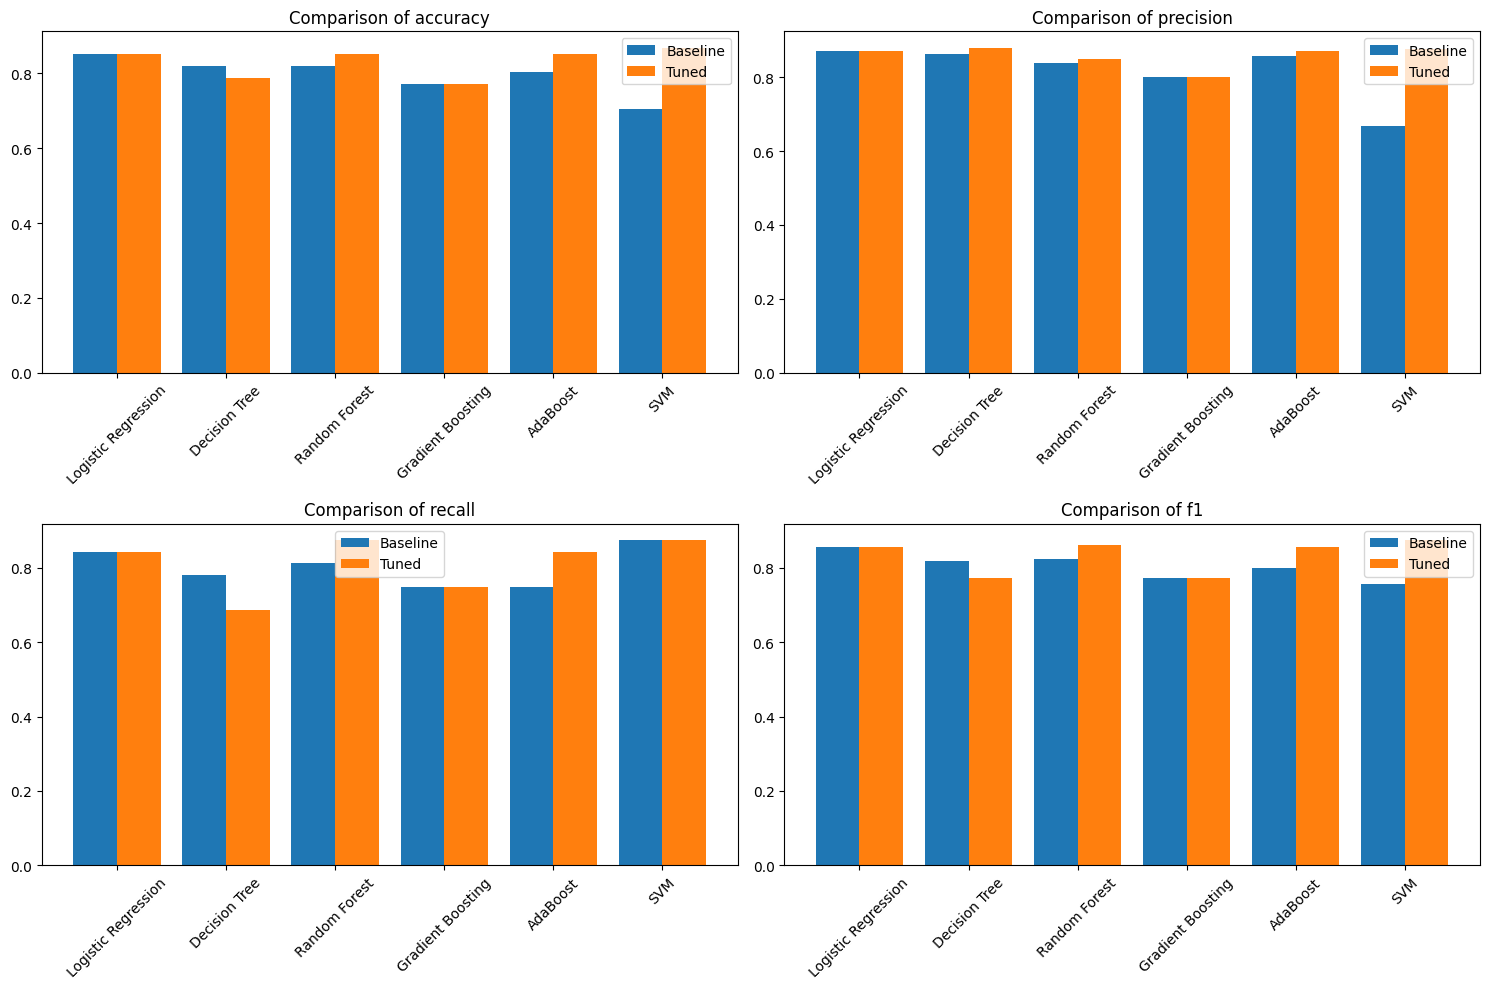


### Accuracy Comparison ###
Logistic Regression: Baseline = 0.8525, Tuned = 0.8525
Decision Tree: Baseline = 0.8197, Tuned = 0.7869
Random Forest: Baseline = 0.8197, Tuned = 0.8525
Gradient Boosting: Baseline = 0.7705, Tuned = 0.7705
AdaBoost: Baseline = 0.8033, Tuned = 0.8525
SVM: Baseline = 0.7049, Tuned = 0.8689

### Precision Comparison ###
Logistic Regression: Baseline = 0.8710, Tuned = 0.8710
Decision Tree: Baseline = 0.8621, Tuned = 0.8800
Random Forest: Baseline = 0.8387, Tuned = 0.8485
Gradient Boosting: Baseline = 0.8000, Tuned = 0.8000
AdaBoost: Baseline = 0.8571, Tuned = 0.8710
SVM: Baseline = 0.6667, Tuned = 0.8750

### Recall Comparison ###
Logistic Regression: Baseline = 0.8438, Tuned = 0.8438
Decision Tree: Baseline = 0.7812, Tuned = 0.6875
Random Forest: Baseline = 0.8125, Tuned = 0.8750
Gradient Boosting: Baseline = 0.7500, Tuned = 0.7500
AdaBoost: Baseline = 0.7500, Tuned = 0.8438
SVM: Baseline = 0.8750, Tuned = 0.8750

### F1 Comparison ###
Logistic Regression: Bas

In [ ]:
# Построение сравнительных графиков для метрик
metrics_to_plot = ['accuracy', 'precision', 'recall', 'f1']

x = np.arange(len(models))

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for i, metric in enumerate(metrics_to_plot):
    baseline_vals = [baseline_results[model][metric] for model in models.keys()]
    tuned_vals = [tuned_results[model][metric] for model in models.keys()]

    axes[i].bar(x - 0.2, baseline_vals, 0.4, label='Baseline')
    axes[i].bar(x + 0.2, tuned_vals, 0.4, label='Tuned')
    axes[i].set_title(f'Comparison of {metric}')
    axes[i].set_xticks(x)
    axes[i].set_xticklabels(models.keys(), rotation=45)
    axes[i].legend()

plt.tight_layout()
plt.show()

# Текстовые выводы
for metric in metrics_to_plot:
    print(f"\n### {metric.capitalize()} Comparison ###")
    for model in models.keys():
        print(f"{model}: Baseline = {baseline_results[model][metric]:.4f}, Tuned = {tuned_results[model][metric]:.4f}")

На основании итоговых метрик, метод опорных векторов (SVM) показал лучший результат после оптимизации гиперпараметров:

*   Accuracy: 86.89%
*   Precision: 87.50%
*   Recall: 87.50%
*   F1 score: 87.50%


Обоснование:

SVM демонстрирует высокую точность и F1-метрику, что подчеркивает высокое качество предсказаний.
Улучшение метрик после настройки гиперпараметров означает, что модель лучше адаптировалась к данным.
Высокие показатели точности (Precision) и полноты (Recall) говорят о хорошей сбалансированности между ложноположительными и ложноотрицательными предсказаниями.
Таким образом, для данной задачи можно рекомендовать метод опорных векторов (SVM) с настроенными гиперпараметрами как лучшую модель с точки зрения общей производительности.